# 단순선형회귀

# 로드맵 

`-` 오늘수업할내용: 단순선형회귀 

`-` 단순선형회귀를 배우는 이유? 

- 우리가 배우고싶은것: 심층신경망(DNN) $\to$ 합성곱신경망(CNN) $\to$ 적대적생성신경망(GAN) 
- 심층신경망을 바로 이해하기 어려움 
- 다음의 과정으로 이해해야함: 선형대수학 $\to$ 회귀분석 $\to$ 로지스틱회귀분석 $\to$ 심층신경망 

# 선형회귀 

`-` 상황극
- 날이 더울수록 아이스아메리카노의 판매량이 증가함
- 이를 바탕으로 일기예보의 온도자료를 이용하여 다음과 같은 수식을 이용해 아이스아메리카노의 판매량을 예측할 수 있음

$$아이스아메리카노 =  \beta_1 \times 온도 + \epsilon$$

`-` 가짜자료 생성 

In [ ]:
#collapse-hide
import matplotlib.pyplot as plt 
import tensorflow as tf 

온도 ${\bf x}$가 아래와 같다고 하자.(tf.constant 함수를 이용하여 상수 텐서를 생성)

In [ ]:
#collapse-hide
x=tf.constant([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4]) # 기온 
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4],
      dtype=float32)>

아이스아메리카노의 판매량 ${\bf y}$이 아래와 같다고 하자. (판매량은 정수로 나오겠지만 편의상 소수점도 가능하다고 생각하자) 

$${\bf y} \approx 10.2 +2.2 {\bf x}$$ 

- 여기에서 10.2, 2.2 의 숫자는 임의로 정한 $\beta_0,\, \beta_1$
- 식의의미: 온도가 0일때 10.2잔정도 팔림 + 온도가 1도 증가하면 2.2잔정도 더 팔림

In [ ]:
#collapse-hide
tf.random.set_seed(43052)
epsilon=tf.random.normal([10]) ## 오차항 생성
y=10.2 + 2.2*x + epsilon
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([55.418365, 58.194283, 61.230827, 62.312557, 63.107002, 63.69569 ,
       67.247055, 71.4365  , 73.1013  , 77.84988 ], dtype=float32)>

`-` 우리는 아래와 같은 자료를 모았다고 생각하자.  

`-` tensorflow 문법에 관한 내용은 이후 수업에서 다루니 크게 신경쓰지 말자

In [ ]:
#collapse-hide
tf.transpose(tf.concat([[x],[y]],0))

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[20.1     , 55.418365],
       [22.2     , 58.194283],
       [22.7     , 61.230827],
       [23.3     , 62.312557],
       [24.4     , 63.107002],
       [25.1     , 63.69569 ],
       [26.2     , 67.247055],
       [27.3     , 71.4365  ],
       [28.4     , 73.1013  ],
       [30.4     , 77.84988 ]], dtype=float32)>

`-` 그려보자. 

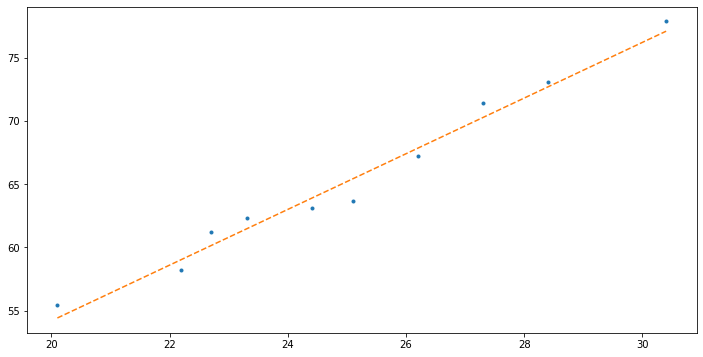

In [ ]:
#collapse-hide
plt.figure(figsize=(12,6))
plt.plot(x,y,'.') # 파란점, 관측한 데이터 
plt.plot(x,10.2 + 2.2*x, '--')  # 주황색점선, 세상의 법칙 

`-` 우리의 목표: 파란색점(관측값)에 기반하여 온도에 따른 아이스크림 판매량에 대한 일반화 식을 만드는 것

`-` 아이디어: 데이터를 보니까 $x$와 $y$가 선형의 관계에 있는듯 보인다. 즉 모든 $i=1,2,\dots, 10$에 대하여 아래를 만족하는 적당한  $\beta_0,\beta_1$가 존재할것 같다. 

$$y_{i} \approx \beta_1 x_{i}+\beta_0$$

`-` 어림짐작으로 $\beta_0,\beta_1$를 알아내보자. 

데이터를 살펴보자. 

In [ ]:
#collapse-hide
tf.transpose(tf.concat([[x],[y]],0))

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[20.1     , 55.418365],
       [22.2     , 58.194283],
       [22.7     , 61.230827],
       [23.3     , 62.312557],
       [24.4     , 63.107002],
       [25.1     , 63.69569 ],
       [26.2     , 67.247055],
       [27.3     , 71.4365  ],
       [28.4     , 73.1013  ],
       [30.4     , 77.84988 ]], dtype=float32)>

적당히 `왼쪽*2+15 = 오른쪽`의 관계가 성립하는것 같다. 

따라서  $\beta_0=15, \beta_1=2$ 로 추론할 수 있겠다. 

`-` 누군가가 $(\beta_0,\beta_1)=(14,2)$ 이라고 주장할 수 있다. (어차피 지금은 감각으로 추론하는 과정이니까) 

`-` 새로운 주장으로 인해서 $(\beta_0,\beta_1)=(15,2)$ 로 볼 수도 있고 $(\beta_0,\beta_1)=(14,2)$ 로 볼 수도 있다. 이중에서 어떠한 추정치가 좋은지 판단할 수 있을까? 
- 후보1: $(\beta_0,\beta_1)=(15,2)$ 
- 후보2: $(\beta_0,\beta_1)=(14,2)$

`-` 가능한 $y_i \approx \beta_0 + \beta_1 x_i$ 이 되도록 만드는 $(\beta_0,\beta_1)$ 이 좋을 것이다. $\to$ 후보 1,2를 비교해보자. 

(관찰에 의한 비교) 

후보1에 대해서 $i=1,2$를 넣고 관찰하여 보자. 

In [ ]:
20.1 * 2 + 15 , 55.418365 # i=1 

(55.2, 55.418365)

In [ ]:
22.2 * 2 + 15 , 58.194283 # i=2

(59.4, 58.194283)

후보2에 대하여 $i=1,2$를 넣고 관찰하여 보자. 

In [ ]:
20.1 * 2 + 14 , 55.418365 # i=1 

(54.2, 55.418365)

In [ ]:
22.2 * 2 + 14 , 58.194283 # i=2

(58.4, 58.194283)

$i=1$인 경우에는 후보1이 더 잘맞는것 같은데 $i=2$인 경우는 후보2가 더 잘맞는것 같다. 

(좀 더 체계적인 비교) 

$i=1,2,3, \dots, 10$ 에서 후보1과 후보2중 어떤것이 더 좋은지 비교하는 체계적인 방법을 생각해보자. 

후보 1,2에 대하여 $\sum_{i=1}^{10} (y_i -\beta_0 -\beta_1 x_i)^2$를 계산하여 비교해보자. 

In [ ]:
sum1=0 
for i in range(10):
    sum1=sum1+(y[i]-15-2*x[i])**2 

In [ ]:
sum2=0 
for i in range(10):
    sum2=sum2+(y[i]-14-2*x[i])**2 

In [ ]:
sum1,sum2

(<tf.Tensor: shape=(), dtype=float32, numpy=14.734169>,
 <tf.Tensor: shape=(), dtype=float32, numpy=31.521088>)

후보1이 더 $\sum_{i=1}^{10} (y_i -\beta_0 -\beta_1 x_i)^2$의 값이 작다. 

후보1이 종합적으로 후보2에 비하여 좋다. 이 과정을 무한번 반복하면 최적의 추정치를 찾을 수 있다. 

`-` 그런데 이 알고리즘은 현실적으로 구현이 불가능하다. (무한번 계산하기도 힘들고, 언제 멈출지도 애매함) 

`-` 수학을 이용해서 좀 더 체계적으로 찾아보자. 결국 아래식을 가장 작게 만드는 $\beta_0,\beta_1$을 찾으면 된다. 

$$\sum_{i=1}^{10} (y_i -\beta_0 -\beta_1 x_i)^2$$

그런데 결국 $\beta_0, \beta_1$에 대한 이차식인데 이 식을 최소화하는 $\beta_0,\beta_1$을 구하기 위해서는 아래를 연립하여 풀면된다. 

$$\begin{cases}
\frac{\partial}{\partial \beta_0}\sum_{i=1}^{10} (y_i -\beta_0 -\beta_1 x_i)^2=0 \\ 
\frac{\partial}{\partial \beta_1}\sum_{i=1}^{10} (y_i -\beta_0 -\beta_1 x_i)^2=0
\end{cases}$$

`-` 풀어보자. 

$$\begin{cases}
\sum_{i=1}^{10} -2(y_i -\beta_0 -\beta_1 x_i)=0 \\ 
\sum_{i=1}^{10} -2x_i(y_i -\beta_0 -\beta_1 x_i)=0
\end{cases}$$

정리하면 

$$\hat{\beta}_0= \bar{y}-\hat{\beta}_1 \bar{x}$$

$$\hat{\beta}_1= \frac{S_{xy}}{S_{xx}}=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$$

`-` 따라서 최적의 추정치 $(\hat{\beta}_0,\hat{\beta}_1)$를 이용한 추세선을 아래와 같이 계산할 수 있음.

In [ ]:
Sxx= sum((x-sum(x)/10)**2)
Sxx

<tf.Tensor: shape=(), dtype=float32, numpy=87.848976>

In [ ]:
Sxy=  sum((x-sum(x)/10)*(y-sum(y)/10))
Sxy

<tf.Tensor: shape=(), dtype=float32, numpy=194.64737>

In [ ]:
beta1_estimated = Sxy/Sxx 
beta1_estimated 

<tf.Tensor: shape=(), dtype=float32, numpy=2.2157044>

In [ ]:
beta0_estimated = sum(y)/10 - beta1_estimated * sum(x)/10 
beta0_estimated

<tf.Tensor: shape=(), dtype=float32, numpy=9.944572>

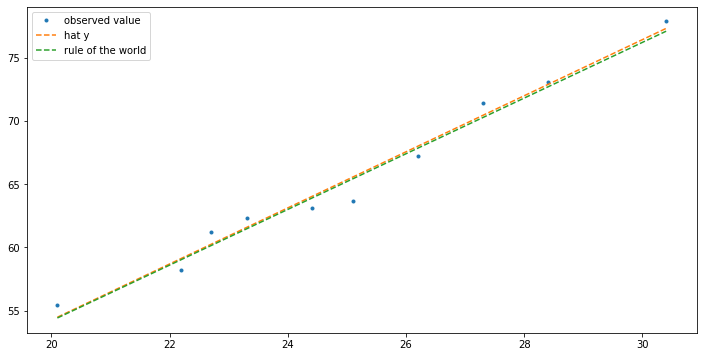

In [ ]:
#collapse-hide
plt.figure(figsize=(12,6))
plt.plot(x,y,'.',label= "observed value")
plt.plot(x,beta0_estimated + beta1_estimated * x, '--',label="hat y") # 주황색선: 세상의 법칙을 추정한선 
plt.plot(x,10.2 + 2.2* x, '--',label = "rule of the world") # 초록색선: ture, 세상의법칙 
plt.legend()

> Note: 샘플수가 커질수록 주황색선은 점점 초록색선으로 가까워진다. (대수의 법칙은 항상 성립하는 듯?)

`-` 꽤 훌륭한 도구임. 그런데 약간의 단점이 존재한다. 

(1) 공식이 좀 복잡함.. 

(2) $x$가 여러개일 경우 확장이 어려움 

`-` 단점을 극복하기 위해서 우리가 지금까지 했던논의를 매트릭스로 바꾸어서 다시 써보자. 

## 모형의 매트릭스화 

* 모형을 행렬로 표현하면 변수가 여러개인 multiple linear regression 에서도 단순형태로 표현이 가능하다.

우리의 모형은 아래와 같다. 

$y_i = \beta_0 + \beta_1 x_i + \epsilon_i, \quad i=1,2,\dots,10$ 

풀어서 쓰면 

$\begin{cases}
y_1 = \beta_0 +\beta_1 x_1 + \epsilon_1 \\ 
y_2 = \beta_0 +\beta_1 x_2 + \epsilon_2 \\ 
\dots \\ 
y_{10} = \beta_0 +\beta_1 x_{10} + \epsilon_{10} 
\end{cases}$

아래와 같이 쓸 수 있다.

$\begin{bmatrix} 
y_1 \\ 
y_2 \\ 
\dots \\
y_{10} 
\end{bmatrix} 
= \begin{bmatrix} 
1 & x_1 \\ 
1 & x_2 \\ 
\dots & \dots \\
1 & x_{10} 
\end{bmatrix}\begin{bmatrix}\beta_0 \\ \beta_1 \end{bmatrix} + \begin{bmatrix} 
\epsilon_1 \\ 
\epsilon_2 \\ 
\dots \\
\epsilon_{10} 
\end{bmatrix} $

벡터와 매트릭스 형태로 정리하면 

${\bf y} = {\bf X} {\boldsymbol \beta} + \boldsymbol{\epsilon}$ 

`-` 손실함수의 매트릭스화: 우리가 최소화 하려던 손실함수는 아래와 같다. 

$loss=\sum_{i=1}^{n}(y_i-\beta_0-\beta_1x_i)^2$

이것을 벡터표현으로 하면 아래와 같다. 

$loss=\sum_{i=1}^{n}(y_i-\beta_0-\beta_1x_i)^2=({\bf y}-{\bf X}{\boldsymbol \beta})^\top({\bf y}-{\bf X}{\boldsymbol \beta})$

풀어보면 

$loss=({\bf y}-{\bf X}{\boldsymbol \beta})^\top({\bf y}-{\bf X}{\boldsymbol \beta})={\bf y}^\top {\bf y} - {\bf y}^\top {\bf X}{\boldsymbol\beta} - {\boldsymbol\beta}^\top {\bf X}^\top {\bf y} + {\boldsymbol\beta}^\top {\bf X}^\top {\bf X} {\boldsymbol\beta}$

`-` 미분하는 과정의 매트릭스화 

loss를 최소화하는 ${\boldsymbol \beta}$를 구해야하므로 loss를 ${\boldsymbol \beta}$로 미분한식을 0이라고 놓고 풀면 된다. 

$\frac{\partial}{\partial \boldsymbol{\beta}} loss = \frac{\partial}{\partial \boldsymbol{\beta}} {\bf y}^\top {\bf y} - \frac{\partial}{\partial \boldsymbol{\beta}} {\bf y}^\top {\bf X}{\boldsymbol\beta} - \frac{\partial}{\partial \boldsymbol{\beta}} {\boldsymbol\beta}^\top {\bf X}^\top {\bf y} + \frac{\partial}{\partial \boldsymbol{\beta}} {\boldsymbol\beta}^\top {\bf X}^\top {\bf X} {\boldsymbol\beta}$ 

$= 0 - {\bf X}^\top {\bf y}- {\bf X}^\top {\bf y} + 2{\bf X}^\top {\bf X}{\boldsymbol\beta} $

따라서 $\frac{\partial}{\partial \boldsymbol{\beta}}loss=0$을 풀면 아래와 같다. 

$\boldsymbol{\hat\beta}= ({\bf X}^\top {\bf X})^{-1}{\bf X}^\top {\bf y} $

`-` 공식도 매트릭스로 표현하면 : $\left(\boldsymbol{\hat\beta}= ({\bf X}^\top {\bf X})^{-1}{\bf X}^\top {\bf y}\right) \leftarrow$ 외우자 이건..

`-` 적용을 해보자. 

(X를 만드는 방법1) 

In [ ]:
X=tf.transpose(tf.concat([[[1.0]*10],[x]],0)) # 
X 

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 1. , 20.1],
       [ 1. , 22.2],
       [ 1. , 22.7],
       [ 1. , 23.3],
       [ 1. , 24.4],
       [ 1. , 25.1],
       [ 1. , 26.2],
       [ 1. , 27.3],
       [ 1. , 28.4],
       [ 1. , 30.4]], dtype=float32)>

(X를 만드는 방법2)

In [ ]:
tf.concat([[[1.0]*10],[x]],0)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4]],
      dtype=float32)>

In [ ]:
tf.concat([[[1.0]*10],[x]],0).T

AttributeError: 
        'EagerTensor' object has no attribute 'T'.
        If you are looking for numpy-related methods, please run the following:
        from tensorflow.python.ops.numpy_ops import np_config
        np_config.enable_numpy_behavior()

* 위 처럼 하면  error가 남
* error를 읽어보면 numpy 스타일로 구성하고 싶을 경우 `np_config.enable_numpy_behavior()` 을 이용하라는 문구가 나옴

In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [ ]:
X = tf.concat([[[1.0]*10],[x]],0).T

오 이제된다.

In [ ]:
X

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 1. , 20.1],
       [ 1. , 22.2],
       [ 1. , 22.7],
       [ 1. , 23.3],
       [ 1. , 24.4],
       [ 1. , 25.1],
       [ 1. , 26.2],
       [ 1. , 27.3],
       [ 1. , 28.4],
       [ 1. , 30.4]], dtype=float32)>

In [ ]:
tf.linalg.inv(X.T @ X) @ X.T @ y

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([9.945015 , 2.2156935], dtype=float32)>

결과를 보면 $ \left(\beta_0,\beta_1\right) = (9.94...,2.21...)$ 로 산출되었다.

`-` 잘 구해진다. 

`-` 그런데.. 

In [ ]:
beta0_estimated,beta1_estimated

(<tf.Tensor: shape=(), dtype=float32, numpy=9.94458>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.2157042>)

값이 좀 다르다..?

`-` 같은 값입니다! 신경쓰지 마세요! 텐서플로우가 좀 대충계산합니다. 

`-` 실제로 조금 더 정확히 계산하기 위해서는 `tensorflow` 안에 내장된 `numpy` 를 사용한다.

In [ ]:
import tensorflow.experimental.numpy as tnp 

In [ ]:
x=tnp.array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4]) 
y=10.2 + 2.2*x + epsilon 

In [ ]:
beta1_estimated = sum((x-sum(x)/10)*(y-sum(y)/10)) / sum((x-sum(x)/10)**2)
beta0_estimated = sum(y)/10 - beta1_estimated * sum(x)/10 

In [ ]:
beta0_estimated, beta1_estimated

(<tf.Tensor: shape=(), dtype=float64, numpy=9.944573294798559>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2.2157046054834106>)

In [ ]:
X=tnp.concatenate([[tnp.array([1.0]*10)],[x]],0).T
tf.linalg.inv(X.T @ X) @ X.T @ y

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([9.94457329, 2.21570461])>

# do next

`-` 선형대수학의 미분이론.. 

`-` tensorflow에서 매트릭스 연산을 자유롭게 다루기 

`-` 정규방정식을 이용하여 베타계수 추정하는 법하고 벡터 미분 정리해서 추가하자

# Extra

## 회귀계수 추정

$$Loss = \sum (y-\beta_0-\beta_1 x)$$

* $\beta_0$ 추정

$$L=Loss = \sum (y-\beta_0-\beta_1 x)$$

$$\frac {d L}{d \beta_0} = -2\sum(y-\beta_0-\beta_1x) = 0$$

$$\therefore\,\,\hat \beta_0 = \bar y -\beta_1 \bar x$$

* $\beta_1$ 추정

\begin{align}\frac {d L}{d \beta_1} &= \sum x \left(y-\beta_0-\beta_1x\right) \\ \\ \nonumber
                                        & = \left (\sum xy -\beta_1 x^2\right )- n\bar x\left (\bar y -\beta_1\bar x \right) \\ \\ \nonumber 
                                         &= \left (\sum xy -\bar x \bar y\right ) -\beta_1 \left (\sum x^2 - (\bar x)^2\right )\nonumber\end{align}

\begin{align} 
\therefore \hat {\beta_1} &=  \frac{\sum xy -\bar x \bar y}{\sum x^2 - (\bar x)^2}  \nonumber \\ \\
&= \frac {S_{xy}}{S_{xx}}  \nonumber
\end{align}

## 벡터 미분 / 매트릭스 미분

$$L=loss=({\bf y}-{\bf X}{\boldsymbol \beta})^\top({\bf y}-{\bf X}{\boldsymbol \beta})$$

### 벡터 미분

\begin{align}  x^{\top}y &= \begin{bmatrix}x_1\dots x_n\end{bmatrix}\begin{bmatrix} y_1   \\ \dots \\ y_n\end{bmatrix}\nonumber  \\  \\ 
      &=  x_1y_1 + x_2y_2+\dots x_ny_n\nonumber  \end{align}

위를 미분하면

\begin{align} \frac {d x^{\top}y}{d x} &= \, \begin{bmatrix} \frac {d}{d x_1}  \\ 
                                                                                       \dots \\ \frac {d}{d x_n}
                                                                                        \end{bmatrix} ( x_1y_1 + x_2y_2+\dots x_ny_n) \nonumber \\ \\  
                                                         &=  \, \begin{bmatrix} y_1   \\ \dots \\ y_n\end{bmatrix}=y                         \nonumber  \end{align}

### 벡터 미분의 다른풀이

#### (1)

$$ \frac {d x^{\top}y}{d x} = \left (\frac {d x^{\top}}{d x}\right) y=y$$

\begin{align}\left( \frac {d x^{\top}}{d x} \right)  = \begin{bmatrix} \frac {d}{d x_1} \\  \dots \\ \frac {d}{d x_{n}} \end {bmatrix} \begin{bmatrix} x_1 \dots x_n \end{bmatrix} =\begin{bmatrix}\frac {d x_1}{d x_1} & \dots & \frac {d x_n}{d x_1} \\ 
                                                                         \dots & \dots  &\dots  \\ 
                                                                        \frac {d x_1}{d x_n} & \dots & \frac {d x_n}{d x_n}     \end{bmatrix} = \mathbf{I} \nonumber \end{align}

$$\therefore \quad \frac {d x^{\top}y}{d x} = \left (\frac {d x^{\top}}{d x}\right) y = \mathbf{I} y = y$$

#### (2)

$$ \frac {d y^{\top}x}{d x} = \left (\frac {d y^{\top}x}{d x}\right) =y $$

$ y^{\top} x $는 $1 \times 1$ 차원이므로 인간이면 이해할 수 있을 듯?

#### (3)

$$\frac {d}{d \boldsymbol{\beta}} \left ( \mathbf{y^{\top}X\boldsymbol \beta}\right ) = \mathbf{X^{\top}y}$$

$\mathbf{y^{\top}X\boldsymbol \beta}$ 는 $1 \times 1$ 인 스칼라 이므로

$$\mathbf{y^{\top}X\boldsymbol \beta} = \left (\mathbf{y^{\top}X\boldsymbol \beta}\right)^{\top} = \boldsymbol \beta^{\top}\mathbf{X^{\top} y}$$

따라서 

\begin{align} \frac {d}{d \boldsymbol{\beta}} \left ( \mathbf{y^{\top}X\boldsymbol \beta}\right ) &= \frac {d}{d \boldsymbol{\beta}} \left (\boldsymbol \beta^{\top}\mathbf{X^{\top} y}\right )\nonumber \\ \\ 
                                                  &= \left ( \frac{d}{d \boldsymbol{\beta}}\boldsymbol{\beta}^{\top}\right)\mathbf{X^{\top y}} \nonumber\\ \\ 
                                                    &= \mathbf{I\,X^{\top}y} \nonumber \\ \\ &= \mathbf{X^{\top}y}    \nonumber      \end{align}

#### (4)

$$ \frac {d }{d \mathbf {y}} (\mathbf{y^{\top}y}) = 2\mathbf{y}$$

$$ d\, \mathbf{y} = \left [\frac {d}{y_1}, \,\frac {d}{y_2}\dots\dots \frac {d}{y_n}\right ]$$

$$\mathbf{y^{\top}y} =  \sum{y_i}^2$$

$$\therefore  \quad \frac {d }{d \mathbf {y}} (\mathbf{y^{\top}y}) = 2\mathbf{y}$$

#### 참고할 틀린풀이

* 아래와 같은 풀이는 1번의 벡터 미분의 다른 풀이처럼 풀면 안된다.

$$ \frac {d }{d \mathbf {y}} (\mathbf{y^{\top}y}) = \mathbf{y}$$

$$ \frac {d\,\mathbf{y^{\top}y}}{d \,\mathbf{y}} = \left (\frac {d\, \mathbf{y^{\top}y}}{d\, \mathbf y}\right) \mathbf y= \mathbf{I} y \neq y$$

because 스칼라 경우를 생각해보자

(틀린풀이 )$\quad \frac {d }{d\,y} y^2 = \left (\frac {d}{d\,y } yy \right) = y$  ?

(올바른 풀이) $\quad \frac {d }{d\,y} y^2 = \left (\frac {d}{d\,y } y_1 \right)+ \left (\frac {d}{d\,y } y_2 \right) = 2y$


스칼라를 예제로 들었는데 벡터에서 이런 느낌이라고 생각하자 이게 표준적으로 사용되는 설명은 아니지만 이해적? 으로는 간편한 듯 

다른풀이 (3)번의 경우도 원래는 안되는데 값이 스칼라 이므로 틀린풀이 처럼 안되는 경우이나 `1 x 1` 행렬이므로 가능한 것이다.

다시 벡터로 돌아오면

(올바른 풀이) $\quad \left ( \frac {d}{d\,\mathbf{y}} (\mathbf{y^{\top}y})\right ) = A + B$

$A = f(\mathbf y)$ , $B = g(\mathbf y)$ 라고 생각하자

$ \frac {d}{d\,\mathbf y} A =\left (\frac {d}{d\,\mathbf y} \mathbf {y^{\top}y} \right ) = \mathbf {I\,y} = \mathbf {I\,y}  $

$B$ 의 경우도 위와 동일하므로

$$\frac {d\,(A+B)}{d\,\mathbf{y}} = \{f(\mathbf {y})\}^{\prime} +\{g(\mathbf {y})\}^{\prime} = 2\mathbf{y}$$

#### (5)

$$\frac{\partial}{\partial \boldsymbol{\beta}} {\boldsymbol\beta}^\top {\bf X}^\top {\bf X} {\boldsymbol\beta} = 2\mathbf{X^{\top}X}\boldsymbol \beta$$

4번의 원리를 이용하면 이지이지

## loss를 미분

$$L=loss=({\bf y}-{\bf X}{\boldsymbol \beta})^\top({\bf y}-{\bf X}{\boldsymbol \beta})$$

$$L = {\bf y}^\top {\bf y} - {\bf y}^\top {\bf X}{\boldsymbol\beta} - {\boldsymbol\beta}^\top {\bf X}^\top {\bf y} + {\boldsymbol\beta}^\top {\bf X}^\top {\bf X} {\boldsymbol\beta}$$

$L$ 을 미분하면

\begin{align} \frac{\partial}{\partial \boldsymbol{\beta}} L &= \frac{\partial}{\partial \boldsymbol{\beta}} {\bf y}^\top {\bf y} - \frac{\partial}{\partial \boldsymbol{\beta}} {\bf y}^\top {\bf X}{\boldsymbol\beta} - \frac{\partial}{\partial \boldsymbol{\beta}} {\boldsymbol\beta}^\top {\bf X}^\top {\bf y} + \frac{\partial}{\partial \boldsymbol{\beta}} {\boldsymbol\beta}^\top {\bf X}^\top {\bf X} {\boldsymbol\beta} \nonumber \\ \\ 
            &=  0 - \mathbf{X^{\top}y} - \mathbf{X^{\top}y} + 2\mathbf{X^{\top}X\boldsymbol \beta}\nonumber \end{align}

따라서 아래와 같은식이 성립한다.

$$  \mathbf{X^{\top}y}= \mathbf{X^{\top} X} \boldsymbol \beta $$

$$\hat {\boldsymbol \beta} = \mathbf{\left (X^{\top}X\right)^{-1}Xy}  $$